##Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss, make_scorer
from scipy.spatial import distance_matrix


## Importing the dataset

Feature 0 is our target variable that indicates musk or not.

Feature 1 shows bag numbers of instances.

In [ ]:
x_train = pd.read_csv("Musk1.csv", header=None, prefix="Feature",sep=",")
print((x_train))

     Feature0  Feature1  Feature2  ...  Feature165  Feature166  Feature167
0           1         1        42  ...         -37           6          30
1           1         1        42  ...         -37           5          30
2           1         1        42  ...         -37           5          31
3           1         1        42  ...         -37           6          30
4           1         2        42  ...         -30          14          26
..        ...       ...       ...  ...         ...         ...         ...
471         0        92        49  ...         -43         -15         -10
472         0        92        38  ...         -28           4          74
473         0        92        43  ...         -37         -19         -36
474         0        92        39  ...         -28           3          74
475         0        92        52  ...         -14          12          96

[476 rows x 168 columns]


In the given example, a representation was made according to the mean. I created a method that represents this instance with a new method that will increase the value of extreme points. I created a new representation by adding the minimum and maximum points in the bag and dividing it into two.This is how I created my option 1 data. I kept 92 instances with 166 features.

In [ ]:
max=x_train.groupby(['Feature1']).max()
min=x_train.groupby(['Feature1']).min()
option_1=(max+min)/2
option_1

,Feature0,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,...,Feature128,Feature129,Feature130,Feature131,Feature132,Feature133,Feature134,Feature135,Feature136,Feature137,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature147,Feature148,Feature149,Feature150,Feature151,Feature152,Feature153,Feature154,Feature155,Feature156,Feature157,Feature158,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167
Feature1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,42.0,-194.5,-125.5,-70.0,-117.0,33.0,36.0,-129.0,-36.5,-11.5,-278.5,-163.5,-86.5,-280.0,-272.0,-301.5,-1.5,-114.0,-146.0,-115.0,-48.5,-23.0,-24.5,150.5,91.0,-10.0,16.0,-96.0,-19.0,80.5,-117.0,-113.5,-46.5,6.0,-135.0,25.5,-167.0,37.0,-143.0,...,4.0,63.5,-48.5,-187.0,13.0,-138.0,-72.0,-146.0,-212.5,-54.0,48.5,-92.5,-14.5,-36.0,-64.5,40.0,60.5,35.0,-178.0,-102.0,-118.5,-45.0,-87.0,47.5,-77.0,-121.5,-111.0,-168.0,-54.0,-195.0,-238.0,-187.5,-34.5,-120.0,-38.5,30.5,48.0,-37.0,5.5,30.5
2,1.0,42.0,-194.5,-122.0,-70.0,-117.0,32.5,36.0,-128.5,-36.5,-11.5,-278.5,-163.0,-86.5,-280.0,-271.5,-300.5,-1.5,-113.5,-145.5,-114.5,-48.0,-23.0,-24.5,149.0,92.0,-10.0,15.5,-96.0,-19.0,80.5,-117.0,58.0,-29.0,7.0,-131.5,65.0,-167.0,37.0,-133.0,...,5.5,63.5,-47.0,-187.0,16.5,-138.0,-71.5,-145.5,-211.0,-55.0,48.0,-92.0,-15.0,-36.0,-63.5,39.0,60.5,35.0,-177.0,-102.0,-118.5,-46.0,-87.5,46.5,-66.5,-122.0,-111.0,-116.5,98.5,-96.0,-238.0,-186.0,-33.0,51.0,126.0,143.5,43.0,-30.5,14.0,27.0
3,1.0,42.0,-166.0,-102.5,-30.5,-116.5,5.0,27.5,-142.5,-37.5,-68.0,-304.0,-180.0,-157.5,-300.0,-281.0,-299.0,42.0,-172.0,-140.5,-174.5,-79.0,-27.0,-10.0,68.0,76.5,-12.5,41.5,-108.5,26.5,77.5,-117.0,-2.0,-18.0,29.5,-108.5,95.5,-170.5,28.0,-95.5,...,18.0,71.0,-12.0,-113.0,-25.0,-128.0,-123.5,-196.0,-250.0,-54.0,28.5,-43.5,-6.0,-32.5,-52.0,35.5,27.0,-4.0,-177.0,-101.0,-120.5,-36.0,-48.0,41.0,-62.5,-78.0,-68.5,-59.5,52.0,-34.5,-235.5,-57.5,-45.5,13.0,120.5,133.5,55.5,-32.5,2.0,16.5
4,1.0,43.0,-147.0,-84.5,-31.0,-117.0,26.0,20.5,-130.0,-22.5,-47.5,-287.0,-225.5,-154.5,-300.5,-282.0,-300.5,-11.5,-130.0,-203.0,-119.0,-90.0,-23.0,-43.0,101.5,77.5,12.5,6.5,-103.0,-16.5,81.5,-117.0,-104.5,-30.5,22.0,-101.5,29.0,-166.5,63.5,-82.5,...,7.0,68.0,-45.5,-112.0,14.5,-134.0,-118.5,-213.5,-239.5,-19.0,21.5,-66.0,-26.0,-83.0,-108.0,69.5,42.5,19.5,-177.0,-101.5,-119.0,-24.0,-64.5,24.0,-57.5,-79.5,-69.0,-107.5,-49.5,-134.5,-237.5,-174.0,-34.0,-87.0,-34.5,31.5,51.0,-38.5,4.5,32.5
5,1.0,63.0,-51.0,-102.0,-20.0,48.5,23.5,27.5,-143.5,-37.5,-55.5,-303.0,-184.0,-157.0,-299.5,-282.0,-299.5,38.5,-169.5,-145.0,-197.0,-78.5,-27.0,-11.5,120.0,76.5,-10.0,42.5,-106.5,24.5,77.0,24.0,21.0,-66.0,12.0,-91.5,175.0,-170.5,30.5,-91.0,...,18.5,65.0,-12.0,-107.5,-18.5,-63.0,-122.0,-195.0,-248.0,-53.0,29.5,-41.0,-7.0,-34.0,-55.5,34.5,24.5,-5.0,0.5,-79.5,-119.0,-38.0,-48.0,41.5,-75.0,-74.5,-69.0,-69.5,50.0,-35.5,-238.5,-165.0,-54.0,-7.0,64.5,113.5,78.0,-23.0,2.0,44.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,7.5,-181.0,-113.5,10.5,-104.5,-106.5,124.5,49.0,46.0,-80.0,-23.5,-103.5,-23.0,-30.0,-16.5,-167.5,70.0,-90.5,-49.0,-36.0,-78.5,57.0,-56.0,-38.0,-91.0,54.5,68.0,6.0,-13.5,-120.5,-116.0,-73.5,43.5,-161.5,44.5,51.5,-56.5,26.0,-140.0,...,-82.0,-145.0,-65.0,1.5,25.5,-10.5,-87.0,-117.5,-55.5,-54.5,57.0,-30.0,-1.0,-53.0,-57.

In the option 1, a representation was made according to the min and max.I created a method that represents this instance with a new method that will devalue the endpoints. I created a new representation by adding the %25 quantile and %75 quantile points in the bag and dividing it into two.This is how I created my option 2 data. I kept 92 instances with 166 features.

In [ ]:
q25_data = x_train.groupby(['Feature1']).quantile(0.25)
q75_data = x_train.groupby(['Feature1']).quantile(0.75)
option_2=(q75_data+q25_data)/2
option_2

,Feature0,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,...,Feature128,Feature129,Feature130,Feature131,Feature132,Feature133,Feature134,Feature135,Feature136,Feature137,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature147,Feature148,Feature149,Feature150,Feature151,Feature152,Feature153,Feature154,Feature155,Feature156,Feature157,Feature158,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167
Feature1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,42.000,-194.500,-125.875,-70.000,-117.000,33.000,36.000,-128.250,-36.500,-11.125,-286.750,-163.500,-86.875,-280.375,-281.375,-301.875,-1.500,-114.375,-146.375,-115.000,-48.500,-23.375,-24.500,150.875,91.375,-10.00,16.000,-95.625,-19.000,80.500,-117.00,-113.125,-46.500,6.000,-135.000,25.500,-167.000,37.375,-143.000,...,4.375,63.125,-48.125,-187.000,13.000,-138.000,-72.000,-146.000,-211.375,-54.000,48.125,-92.875,-14.875,-36.000,-64.500,39.625,60.500,34.625,-178.000,-102.000,-118.125,-45.000,-87.000,47.125,-77.000,-121.500,-111.000,-168.000,-54.000,-195.000,-238.000,-187.875,-33.750,-120.000,-38.500,30.125,48.000,-37.000,5.500,30.125
2,1.0,42.000,-194.500,-122.000,-70.000,-117.000,33.250,36.375,-127.750,-36.875,-11.125,-285.625,-163.000,-86.875,-280.000,-280.875,-300.875,-1.125,-113.500,-145.500,-114.500,-48.375,-23.000,-24.875,149.375,91.625,-10.00,15.500,-96.375,-19.375,80.500,-117.00,56.500,-28.250,6.625,-131.125,65.375,-167.000,36.625,-132.625,...,5.500,63.875,-47.000,-187.000,16.125,-138.000,-71.500,-145.500,-210.625,-55.000,48.000,-92.375,-15.000,-35.625,-63.500,39.375,60.500,35.000,-177.000,-102.000,-118.875,-46.000,-87.500,46.500,-66.500,-122.000,-111.000,-118.750,97.375,-105.000,-238.000,-186.375,-32.250,51.000,126.750,143.500,42.625,-30.125,14.000,26.250
3,1.0,42.000,-166.000,-102.500,-30.500,-116.500,5.000,27.500,-142.500,-37.500,-68.000,-304.000,-180.000,-157.500,-300.000,-281.000,-299.000,42.000,-172.000,-140.500,-174.500,-79.000,-27.000,-10.000,68.000,76.500,-12.50,41.500,-108.500,26.500,77.500,-117.00,-2.000,-18.000,29.500,-108.500,95.500,-170.500,28.000,-95.500,...,18.000,71.000,-12.000,-113.000,-25.000,-128.000,-123.500,-196.000,-250.000,-54.000,28.500,-43.500,-6.000,-32.500,-52.000,35.500,27.000,-4.000,-177.000,-101.000,-120.500,-36.000,-48.000,41.000,-62.500,-78.000,-68.500,-59.500,52.000,-34.500,-235.500,-57.500,-45.500,13.000,120.500,133.500,55.500,-32.500,2.000,16.500
4,1.0,42.500,-158.500,-73.750,-48.000,-117.000,20.500,22.250,-133.000,-24.250,-36.250,-291.500,-221.250,-129.750,-297.250,-282.000,-299.750,-19.250,-115.500,-196.000,-146.000,-80.000,-24.500,-45.000,108.750,75.750,14.25,-4.750,-117.000,3.750,84.750,-117.00,-103.250,-34.750,15.500,-117.750,27.500,-165.750,59.750,-66.750,...,2.500,72.000,-41.750,-149.500,15.250,-136.000,-94.250,-191.750,-231.750,-18.000,14.750,-42.500,-16.500,-59.000,-102.000,67.250,27.750,-0.250,-177.000,-101.250,-119.500,-23.000,-53.250,25.000,-66.250,-99.750,-90.000,-98.250,-47.750,-118.250,-237.250,-126.000,-5.500,-77.000,-33.250,31.250,50.000,-38.250,5.750,32.250
5,1.0,60.750,-83.250,-102.000,-27.875,-75.250,16.750,29.750,-143.500,-37.875,-36.000,-302.250,-181.375,-96.625,-300.625,-282.375,-300.625,40.750,-166.500,-142.000,-186.125,-78.875,-26.625,-10.375,109.875,76.500,-11.50,42.500,-99.000,25.250,68.750,-57.00,7.500,-31.500,13.875,-95.250,103.375,-172.750,29.375,-88.000,...,32.375,58.250,-0.375,-110.500,-9.125,-79.875,-120.125,-196.125,-250.625,-52.250,30.250,-31.625,-6.250,-34.000,-53.250,32.625,25.250,-4.250,-132.625,-94.875,-119.000,-36.125,-42.000,41.125

Splitting the dataset into the feature and target set.

In [ ]:
x_train_1=option_1.iloc[:,1:]
x_train_2=option_2.iloc[:,1:]
y_train=option_1.iloc[:,0]
print(x_train)
print(y_train)

     Feature0  Feature1  Feature2  ...  Feature165  Feature166  Feature167
0           1         1        42  ...         -37           6          30
1           1         1        42  ...         -37           5          30
2           1         1        42  ...         -37           5          31
3           1         1        42  ...         -37           6          30
4           1         2        42  ...         -30          14          26
..        ...       ...       ...  ...         ...         ...         ...
471         0        92        49  ...         -43         -15         -10
472         0        92        38  ...         -28           4          74
473         0        92        43  ...         -37         -19         -36
474         0        92        39  ...         -28           3          74
475         0        92        52  ...         -14          12          96

[476 rows x 168 columns]
Feature1
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
     ... 
88   

I scaled the feature matrix for KNN classifier. I used standard scaler for feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_1 = StandardScaler()
x_train_1_sc = scaler_1.fit_transform(x_train_1)
scaler_2 = StandardScaler()
x_train_2_sc = scaler_2.fit_transform(x_train_2)


## K-Nearest Neighbors (K-NN)

Import Libraries for KNN classifier

In [104]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

###**Option 1: Max-Min representation**

I used knn as the first classification. I experimented with different k values ​​for both eucludian and manhattan distance units.

I have shown the error rates on the graph, with k values ​​varying from 1 to 30.

First, I made a classification on the option 1 data(min-max).

Text(0, 0.5, 'Error Rate')

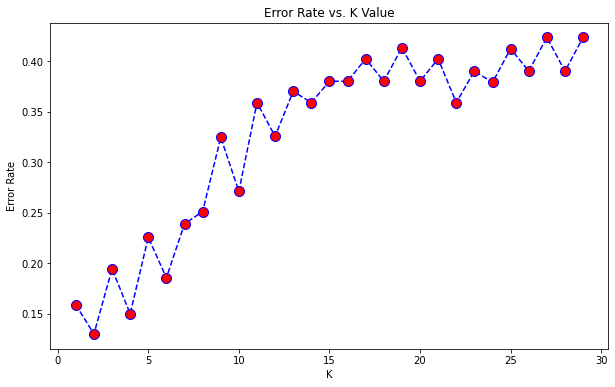

In [ ]:
error_rate = []
for i in range(1,30):
 knn = KNeighborsClassifier(n_neighbors=i,p=1)
 scores = cross_val_score(knn, x_train_1_sc, y_train, cv=10,scoring="accuracy")
 error_rate.append(1-np.mean(scores))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#KNN with manhattan distance with best k value
knn=KNeighborsClassifier(n_neighbors=2,p=1)
scores = cross_val_score(knn, x_train_1_sc, y_train, cv=10,scoring="accuracy")
print(np.mean(scores))

0.8699999999999999


Text(0, 0.5, 'Error Rate')

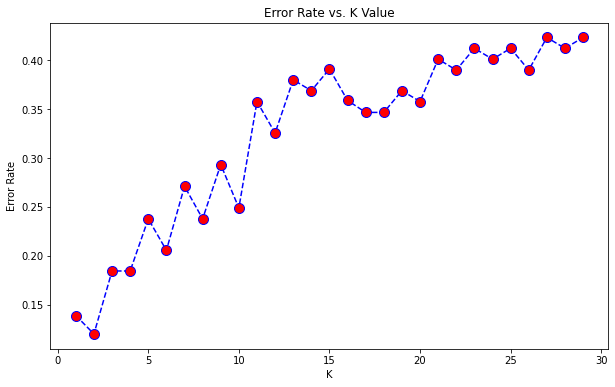

In [ ]:
error_rate = []
for i in range(1,30):
 knn = KNeighborsClassifier(n_neighbors=i,p=2)
 scores = cross_val_score(knn, x_train_1_sc, y_train, cv=10,scoring="accuracy")
 error_rate.append(1-np.mean(scores))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#KNN with euclidian distance with best k value
knn=KNeighborsClassifier(n_neighbors=2,p=2)
scores = cross_val_score(knn, x_train_1_sc, y_train, cv=10)
print(np.mean(scores))

0.8800000000000001


###**Option 2: Quantiles representation**

I used knn as the first classification. I experimented with different k values ​​for both eucludian and manhattan distance units.

I have shown the error rates on the graph, with k values ​​varying from 1 to 30.

First, I made a classification on the option 2 data(quantile %25 - quantile %75).

Text(0, 0.5, 'Error Rate')

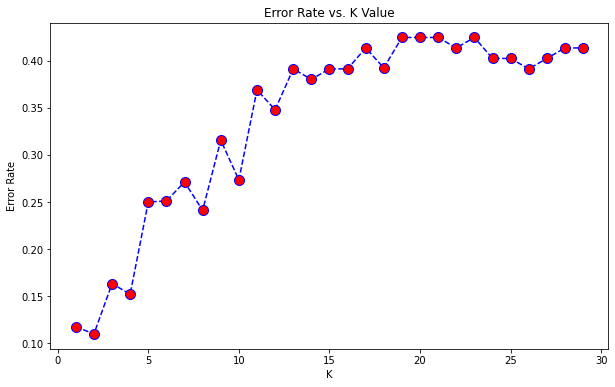

In [ ]:
error_rate = []
for i in range(1,30):
 knn = KNeighborsClassifier(n_neighbors=i,p=1)
 scores = cross_val_score(knn, x_train_2_sc, y_train, cv=10,scoring="accuracy")
 error_rate.append(1-np.mean(scores))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#KNN with manhattan distance with best k value
knn=KNeighborsClassifier(n_neighbors=2,p=1)
scores = cross_val_score(knn, x_train_2_sc, y_train, cv=10,scoring="accuracy")
print(np.mean(scores))

0.89


Text(0, 0.5, 'Error Rate')

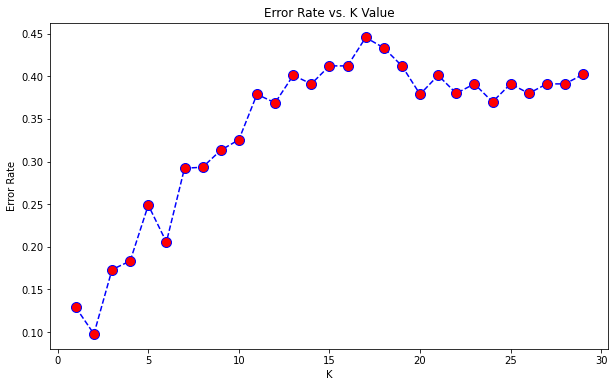

In [ ]:
error_rate = []
for i in range(1,30):
 knn = KNeighborsClassifier(n_neighbors=i,p=2)
 scores = cross_val_score(knn, x_train_2_sc, y_train, cv=10,scoring="accuracy")
 error_rate.append(1-np.mean(scores))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#KNN with euclidian distance with best k value
knn=KNeighborsClassifier(n_neighbors=2,p=2)
scores = cross_val_score(knn, x_train_2_sc, y_train, cv=10,scoring="accuracy")
print(np.mean(scores))

0.9022222222222223


###**Results of KNN Classifier**

I got 4 different results in total.

Option 1 (Min-Max) with Manhattan Distance  :  **0.870**

Option 1 (Min-Max) with Euclidean Distance  : **0.880**

Option 2 (Quantiles) with Manhattan Distance  : **0.890**

Option 2 (Quantiles) with Euclidean Distance  : **0.902**

Option 2 (Quantiles) with Euclidean Distance has the best score among the knn classifiers.

## Random Forest Classifier

In [ ]:
#Import libraies
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
import time

###**Option 1: Max-Min representation**

I used random forest classifier as the second classification. I used RandomizedSearchCV for finding best parameters. First I used GridSearchCV, but to save time, I aimed to find near-optimal parameters using RandomizedSearchCV.

Then print best parameter and best score of selected random forest classifier.

First, I made a classification on the option 1 data(min-max).

In [109]:
start = time.time()
rf_classifier = RandomForestClassifier(random_state = 582)

param_grid = {'n_estimators': np.arange(50, 500),
             'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth': np.arange(5,20),
              'criterion' :['gini', 'entropy'],
             'min_samples_leaf': np.arange(1,10)
             }

rf_cv = RandomizedSearchCV(rf_classifier, param_grid, n_iter=300, scoring='accuracy', cv=10, verbose=1, random_state=582)
rf_cv.fit(x_train_1, y_train)
end = time.time()
print("Runtime For Random Forest: {:.3f} seconds".format(end-start))

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Runtime For Random Forest: 1470.027 seconds


In [112]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 92}

In [113]:
print(f"Best Score: {rf_cv.best_score_:.4f}")

Best Score: 0.8900


###**Option 2: Quantiles representation**

I used random forest classifier as the second classification. I used GridSearchCV for finding best parameters. First I used GridSearchCV, but to save time, I aimed to find near-optimal parameters using RandomizedSearchCV.

Then print best parameter and best score of selected random forest classifier.

First, I made a classification on the option  2 data(quantile %25 - quantile %75).

In [114]:
start = time.time()
rf_classifier = RandomForestClassifier(random_state = 582)

param_grid = {'n_estimators': np.arange(50, 500),
             'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth': np.arange(5,20),
              'criterion' :['gini', 'entropy'],
             'min_samples_leaf': np.arange(1,10)
             }

rf_cv_2 = RandomizedSearchCV(rf_classifier, param_grid, n_iter=300, scoring='accuracy', cv=10, verbose=1, random_state=582)
rf_cv_2.fit(x_train_2, y_train)
end = time.time()
print("Runtime For Random Forest: {:.3f} seconds".format(end-start))

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Runtime For Random Forest: 1445.440 seconds


In [115]:
rf_cv_2.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 194}

In [116]:
print(f"Best Score: {rf_cv_2.best_score_:.4f}")

Best Score: 0.8700


### **Results of Random Forest Classifier**

I got 2 different results in total.

Option 1 (Min-Max) with Random Forest  : **0.890**

Option 2 (Quantiles) with Random Forest  : **0.870**

Best score is Option 1 (Min-Max) with Random Forest among Random Forest classifiers.

## Total Results and comments

There were 6 results in total.

Option 1 (Min-Max) with Manhattan Distance  :  **0.870**

Option 1 (Min-Max) with Euclidean Distance  : **0.880**

Option 2 (Quantiles) with Manhattan Distance  : **0.890**

Option 2 (Quantiles) with Euclidean Distance  : **0.902**

Option 1 (Min-Max) with Random Forest  : **0.890**

Option 2 (Quantiles) with Random Forest  : **0.870**

Looking at the overall results, the results obtained with option 2 and knn give better results. Best score is "**Option 2 (Quantiles) with Euclidean Distance : 0.902**". 

Looking at the Random Forest classifier, Option 1 gave better results than option 2. We can conclude that Random Forest is less affected by extreme values.

**As a result, considering both time and accuracy, using knn classification seems more logical than random forest. In addition, option 2 gives better results than option 1. Because the option 1 is created according to min max values, it is more affected by extreme points. Therefore it gives worse results in representing the overall data.**



In [ ]:
%%shell
jupyter nbconvert --to html /content/IE582_Fall21_Homework4.ipynb